<a href="https://colab.research.google.com/github/gaeguriwadukerbi/-zeal/blob/main/deep_learning_redive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset URL: https://www.kaggle.com/datasets/bhuviranga/customer-churn-data
License(s): DbCL-1.0
customer-churn-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  customer-churn-data.zip
  inflating: Bank Customer Churn Prediction.csv  
   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         11

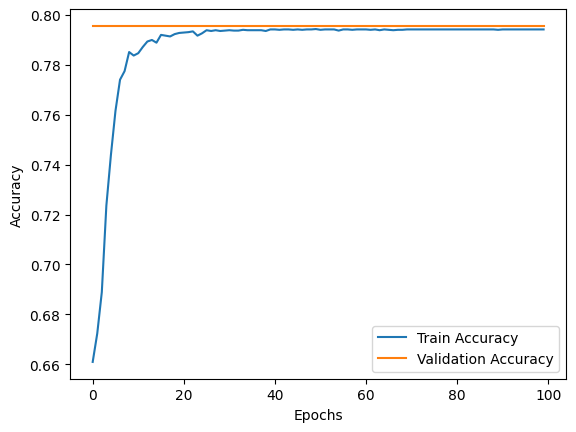

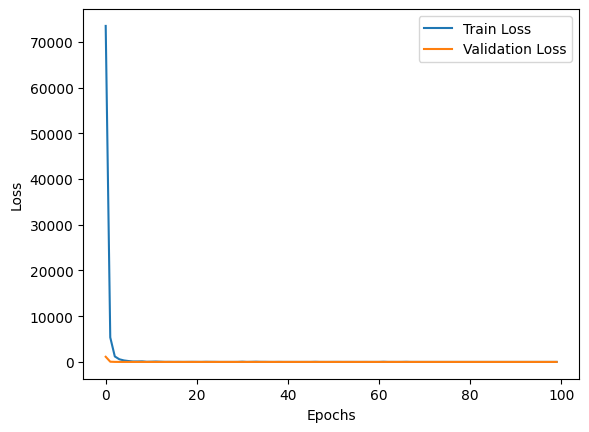

In [ ]:
import json
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Kaggle API 설정
!mkdir -p ~/.kaggle
with open('kaggle.json', 'w') as f:
    f.write('{"username":"YOUR_USERNAME","key":"YOUR_KEY"}')
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 데이터셋 다운로드 및 압축 해제
!kaggle datasets download -d bhuviranga/customer-churn-data
!unzip -o customer-churn-data.zip

# 데이터 로드
data = pd.read_csv('Bank Customer Churn Prediction.csv')

# 데이터 확인
print(data.head())
print(data.info())
print(data.describe())

# 존재하는 열 이름 확인
print(data.columns)

# 범주형 변수 및 수치형 변수 전처리
label_encoders = {}
categorical_features = ['country', 'gender']

for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

scaler = StandardScaler()
numerical_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

data[numerical_features] = scaler.fit_transform(data[numerical_features])

# 입력 변수(X)와 출력 변수(y) 분리
X = data.drop('churn', axis=1)
y = data['churn']

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 딥러닝 모델 생성
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# 모델 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# 학습 결과 시각화
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Dataset URL: https://www.kaggle.com/datasets/bhuviranga/customer-churn-data
License(s): DbCL-1.0
customer-churn-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  customer-churn-data.zip
  inflating: Bank Customer Churn Prediction.csv  
Epoch 1/100
219/219 [==============================] - 6s 19ms/step - loss: 63516.5586 - accuracy: 0.6714 - val_loss: 637.6227 - val_accuracy: 0.8107
Epoch 2/100
219/219 [==============================] - 3s 15ms/step - loss: 8248.8740 - accuracy: 0.6676 - val_loss: 88.3205 - val_accuracy: 0.8107
Epoch 3/100
219/219 [==============================] - 1s 6ms/step - loss: 1423.4017 - accuracy: 0.6687 - val_loss: 95.6426 - val_accuracy: 0.8107
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 606.5951 - accuracy: 0.6647 - val_loss: 20.9338 - val_accuracy: 0.8107
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 315.9753 - accuracy: 0.6686 - val_loss: 4.8035

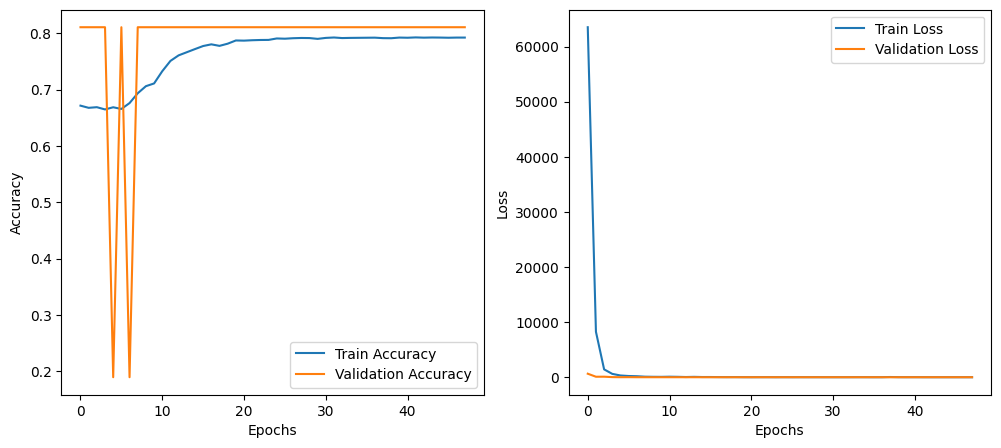

In [ ]:
import json
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Kaggle API 설정
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 데이터셋 다운로드 및 압축 해제
!kaggle datasets download -d bhuviranga/customer-churn-data
!unzip -o customer-churn-data.zip

# 데이터 로드
data = pd.read_csv('Bank Customer Churn Prediction.csv')

# 데이터 전처리
label_encoders = {}
categorical_features = ['country', 'gender']
numerical_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']

# 범주형 변수 인코딩
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

# 수치형 변수 표준화
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# 입력 변수(X)와 출력 변수(y) 분리
X = data.drop('churn', axis=1)
y = data['churn']

# 데이터셋 분할: 훈련, 검증, 테스트 세트
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 신경망 모델 구축
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 조기 종료 콜백 추가
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 훈련
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# 테스트 세트에서 모델 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# 정확도 및 손실 그래프
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Dataset URL: https://www.kaggle.com/datasets/bhuviranga/customer-churn-data
License(s): DbCL-1.0
customer-churn-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  customer-churn-data.zip
  inflating: Bank Customer Churn Prediction.csv  
Epoch 1/100
319/319 [==============================] - 4s 6ms/step - loss: 55843.3594 - accuracy: 0.5030 - val_loss: 171.6025 - val_accuracy: 0.5055
Epoch 2/100
319/319 [==============================] - 1s 4ms/step - loss: 1969.4341 - accuracy: 0.4950 - val_loss: 4.1480 - val_accuracy: 0.4945
Epoch 3/100
319/319 [==============================] - 2s 7ms/step - loss: 576.5926 - accuracy: 0.5034 - val_loss: 0.6931 - val_accuracy: 0.5055
Epoch 4/100
319/319 [==============================] - 3s 10ms/step - loss: 216.0714 - accuracy: 0.5044 - val_loss: 0.6931 - val_accuracy: 0.5055
Epoch 5/100
319/319 [==============================] - 4s 13ms/step - loss: 162.4855 - accuracy: 0.5057 - val_loss: 0.6931 - v

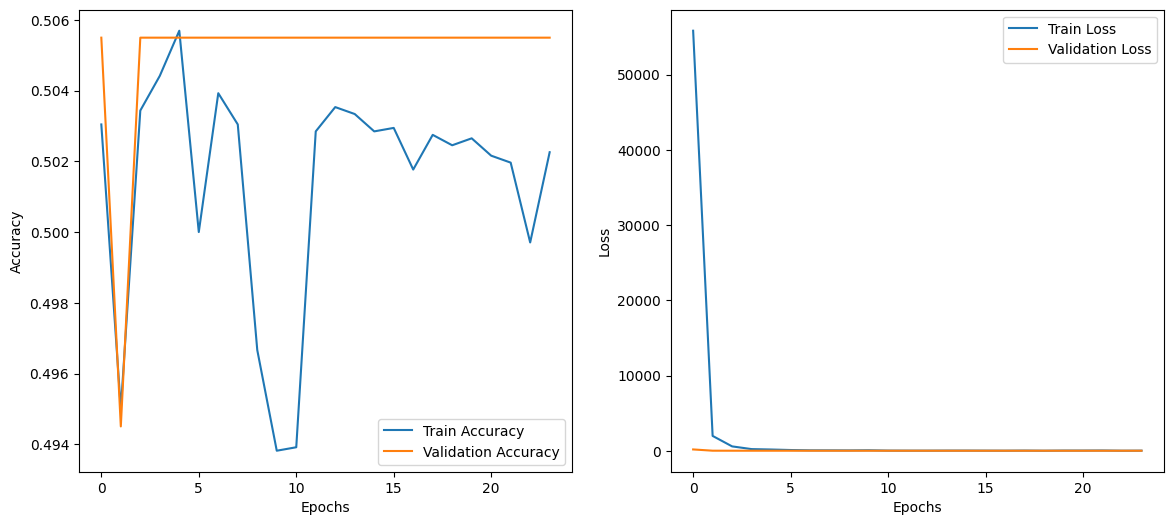

In [ ]:
import json
import os

# Kaggle API 설정
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 데이터셋 다운로드 및 압축 해제
!kaggle datasets download -d bhuviranga/customer-churn-data
!unzip -o customer-churn-data.zip

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE

# 데이터 로드
data = pd.read_csv('Bank Customer Churn Prediction.csv')

# 데이터 전처리
categorical_features = ['country', 'gender']
numerical_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']

# 범주형 변수 인코딩
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

# 수치형 변수 표준화
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# 입력 변수(X)와 출력 변수(y) 분리
X = data.drop('churn', axis=1)
y = data['churn']

# 데이터 불균형 해결을 위한 오버샘플링
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 모델 구성
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 조기 종료 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# 최종 모델 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# 결과 시각화
import matplotlib.pyplot as plt

# 정확도 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 손실 시각화
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Epoch 1/100
200/200 [==============================] - 5s 15ms/step - loss: 0.4598 - accuracy: 0.8012 - val_loss: 0.3838 - val_accuracy: 0.8250
Epoch 2/100
200/200 [==============================] - 2s 11ms/step - loss: 0.4028 - accuracy: 0.8266 - val_loss: 0.3604 - val_accuracy: 0.8537
Epoch 3/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3868 - accuracy: 0.8388 - val_loss: 0.3530 - val_accuracy: 0.8575
Epoch 4/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3772 - accuracy: 0.8452 - val_loss: 0.3472 - val_accuracy: 0.8625
Epoch 5/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3697 - accuracy: 0.8455 - val_loss: 0.3440 - val_accuracy: 0.8581
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3633 - accuracy: 0.8508 - val_loss: 0.3492 - val_accuracy: 0.8600
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3610 - accuracy: 0.8517 - val_loss: 0.3504 - val_accuracy: 0.85

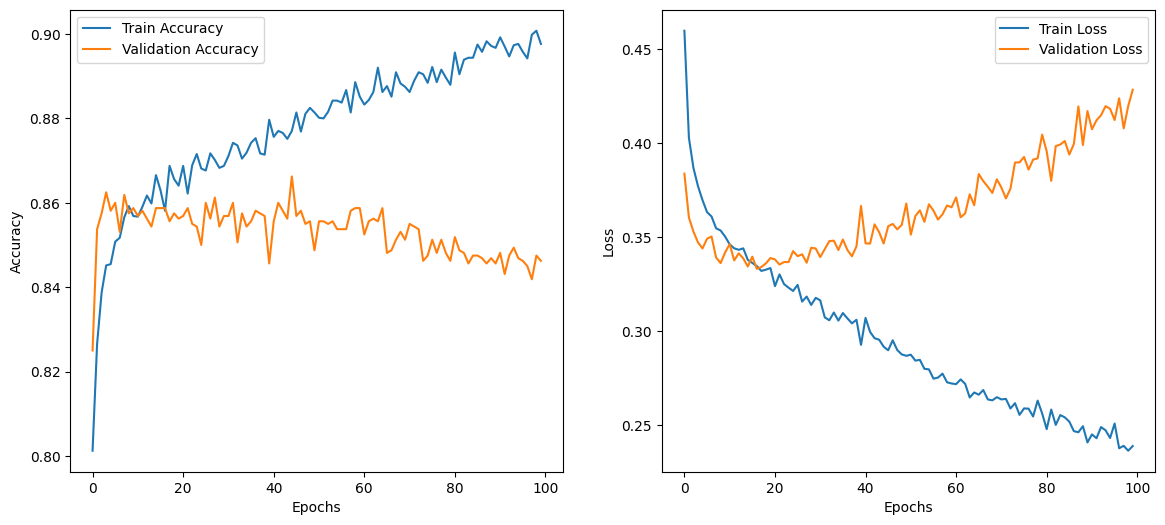

63/63 [==============================] - 0s 2ms/step - loss: 0.4203 - accuracy: 0.8530
Test Loss: 0.4202890992164612
Test Accuracy: 0.8529999852180481


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# 데이터 로드
data = pd.read_csv('Bank Customer Churn Prediction.csv')

# 데이터 전처리
data = data.drop('customer_id', axis=1)

# 범주형 변수 인코딩
label_encoders = {}
categorical_features = ['country', 'gender']

for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

# 수치형 변수 표준화
scaler = StandardScaler()
numerical_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# 입력 변수(X)와 출력 변수(y) 분리
X = data.drop('churn', axis=1)
y = data['churn']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 모델 정의
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# 학습 결과 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 테스트 데이터에서 모델 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


In [ ]:
import pandas as pd

# 파일 경로 지정
data_path = '/content/Bank Customer Churn Prediction.csv'

# 데이터 로드
data = pd.read_csv(data_path)

# 데이터 확인
print(data.head())



FileNotFoundError: [Errno 2] No such file or directory: '/content/Bank Customer Churn Prediction.csv'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 데이터 로드
data_path = '/content/Bank Customer Churn Prediction.csv'
data = pd.read_csv(data_path)

# 범주형 변수 인코딩
data['country'] = LabelEncoder().fit_transform(data['country'])
data['gender'] = LabelEncoder().fit_transform(data['gender'])

# 특성과 레이블 분리
X = data.drop(columns=['customer_id', 'churn'])
y = data['churn']

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


FileNotFoundError: [Errno 2] No such file or directory: '/content/Bank Customer Churn Prediction.csv'

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/bhuviranga/customer-churn-data
License(s): DbCL-1.0
  0% 0.00/187k [00:00<?, ?B/s]
100% 187k/187k [00:00<00:00, 99.5MB/s]
Archive:  customer-churn-data.zip
  inflating: Bank Customer Churn Prediction.csv  
customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64
Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 0.5320 - accuracy: 0.7716 - val_loss: 0.4373 - val_accuracy: 0.8019
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4750 - accuracy: 0.7959 - val_loss: 0.4213 - val_accuracy: 0.8188
Epoch 3/100
200/200 [==============================] 

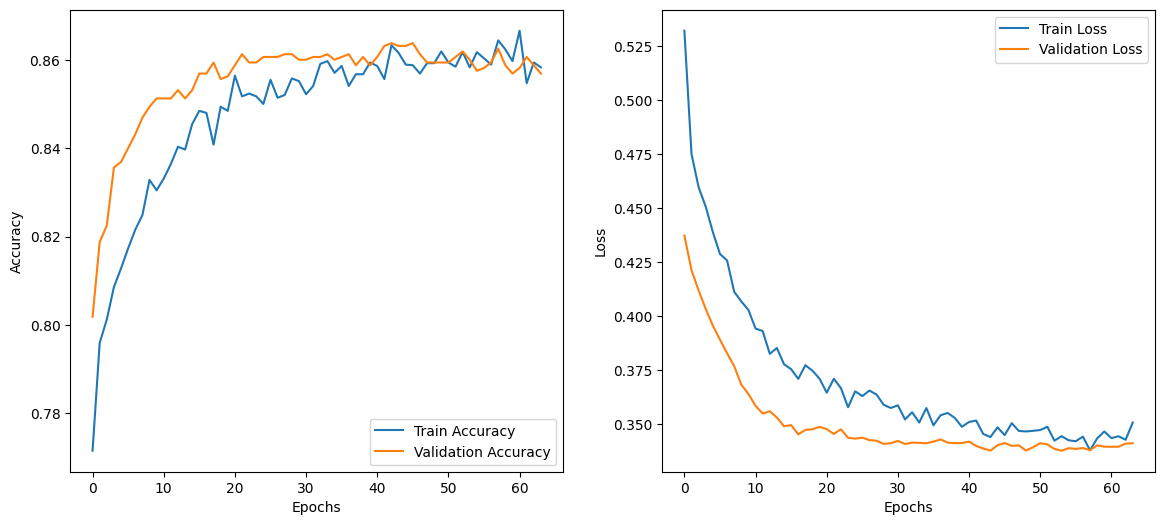

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# Kaggle API 설정
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 데이터셋 다운로드 및 압축 해제
!kaggle datasets download -d bhuviranga/customer-churn-data
!unzip -o customer-churn-data.zip


# 데이터 경로 설정 (업로드된 파일 경로로 설정)
data_path = '/content/Bank Customer Churn Prediction.csv'

# 데이터 로드
data = pd.read_csv(data_path)

# 결측값 확인
print(data.isnull().sum())

# 결측값 제거 (없을 경우 이 부분 생략 가능)
data = data.dropna()

# 범주형 변수 인코딩
data = pd.get_dummies(data, drop_first=True)

# 입력 변수(X)와 출력 변수(y) 분리
X = data.drop('churn', axis=1)
y = data['churn']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 구성
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 조기 종료 콜백
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# 성능 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# 정확도와 손실 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
import numpy as np  # 수치 연산을 위한 라이브러리
import pandas as pd  # 데이터 분석을 위한 라이브러리
import matplotlib.pyplot as plt  # 시각화를 위한 라이브러리
from sklearn.model_selection import train_test_split  # 데이터 분할을 위한 함수
from sklearn.preprocessing import StandardScaler  # 데이터 표준화를 위한 클래스
from keras.models import Sequential  # 순차 모델을 생성하기 위한 클래스
from keras.layers import Dense, Dropout  # 층(layer)과 드롭아웃(dropout) 레이어를 추가하기 위한 클래스
from keras.callbacks import EarlyStopping  # 조기 종료를 위한 콜백 함수

# Kaggle API 설정
# Kaggle API를 사용하여 데이터를 다운로드하기 위한 디렉토리 및 파일 설정
!mkdir -p ~/.kaggle  # .kaggle 디렉토리 생성
!cp kaggle.json ~/.kaggle/  # kaggle.json 파일을 .kaggle 디렉토리로 복사
!chmod 600 ~/.kaggle/kaggle.json  # kaggle.json 파일의 권한 설정

# 데이터셋 다운로드 및 압축 해제
# Kaggle에서 데이터셋을 다운로드하고 압축을 해제하는 명령어
!kaggle datasets download -d bhuviranga/customer-churn-data  # Kaggle API를 통해 데이터셋 다운로드
!unzip -o customer-churn-data.zip  # 다운로드한 zip 파일 압축 해제

# 데이터 경로 설정 (압축 해제된 파일의 경로를 지정합니다)
data_path = 'Bank Customer Churn Prediction.csv'  # CSV 파일의 경로를 설정

# 데이터 로드
# pandas를 사용하여 CSV 파일을 데이터프레임으로 로드합니다.
data = pd.read_csv(data_path)  # CSV 파일을 읽어 데이터프레임으로 저장

# 결측값 확인
# 각 열에 결측값이 있는지 확인하여 데이터의 품질을 점검합니다.
print(data.isnull().sum())  # 각 열의 결측값 개수를 출력

# 결측값 제거 (없을 경우 이 부분 생략 가능)
# 결측값이 있는 행을 삭제합니다. (현재 데이터셋에는 결측값이 없음)
data = data.dropna()  # 결측값이 있는 행을 삭제

# 범주형 변수 인코딩
# 범주형 데이터를 수치형으로 변환하기 위해 원-핫 인코딩을 사용합니다.
data = pd.get_dummies(data, drop_first=True)  # 범주형 변수에 대해 원-핫 인코딩 수행

# 입력 변수(X)와 출력 변수(y) 분리
# 'churn' 열을 출력 변수로 설정하고 나머지 열을 입력 변수로 설정합니다.
X = data.drop('churn', axis=1)  # 입력 변수를 정의
y = data['churn']  # 출력 변수를 정의

# 데이터 분할
# 데이터를 학습 세트와 테스트 세트로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 데이터를 80:20 비율로 분할

# 데이터 스케일링
# 입력 데이터를 표준화하여 평균이 0, 분산이 1이 되도록 변환합니다.
scaler = StandardScaler()  # StandardScaler 객체 생성
X_train = scaler.fit_transform(X_train)  # 학습 데이터에 대해 스케일링 수행
X_test = scaler.transform(X_test)  # 테스트 데이터에 대해 동일한 스케일링 수행

# 모델 구성
# 신경망 모델을 구성합니다.
model = Sequential()  # 순차 모델 객체 생성
# 첫 번째 은닉층: 64개의 뉴런, ReLU 활성화 함수
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # 첫 번째 Dense 층 추가
# 드롭아웃: 50%의 뉴런을 무작위로 비활성화하여 과적합을 방지합니다.
model.add(Dropout(0.5))  # 첫 번째 Dropout 층 추가
# 두 번째 은닉층: 32개의 뉴런, ReLU 활성화 함수
model.add(Dense(32, activation='relu'))  # 두 번째 Dense 층 추가
# 드롭아웃: 50%의 뉴런을 무작위로 비활성화
model.add(Dropout(0.5))  # 두 번째 Dropout 층 추가
# 출력층: 1개의 뉴런, 시그모이드 활성화 함수 (이진 분류 문제이므로)
model.add(Dense(1, activation='sigmoid'))  # 출력층 추가

# 모델 컴파일
# Adam 옵티마이저와 이진 교차 엔트로피 손실 함수를 사용하여 모델을 컴파일합니다.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # 모델 컴파일

# 조기 종료 콜백
# 검증 손실(val_loss)이 10 에포크(epoch) 동안 개선되지 않으면 학습을 중단하고 최적의 가중치를 복원합니다.
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)  # 조기 종료 콜백 설정

# 모델 학습
# 학습 데이터를 사용하여 모델을 학습합니다.
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])  # 모델 학습

# 성능 평가
# 테스트 데이터를 사용하여 모델의 성능을 평가합니다.
loss, accuracy = model.evaluate(X_test, y_test)  # 테스트 데이터로 모델 평가
print(f'Test Loss: {loss}')  # 테스트 손실 출력
print(f'Test Accuracy: {accuracy}')  # 테스트 정확도 출력

# 정확도와 손실 시각화
# 학습 과정에서의 정확도와 손실 변화를 시각화합니다.
plt.figure(figsize=(14, 6))  # 그래프 크기 설정

# 정확도 그래프
plt.subplot(1, 2, 1)  # 첫 번째 서브플롯 설정
plt.plot(history.history['accuracy'], label='Train Accuracy')  # 학습 정확도 그래프
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # 검증 정확도 그래프
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Accuracy')  # y축 레이블 설정
plt.legend()  # 범례 표시

# 손실 그래프
plt.subplot(1, 2, 2)  # 두 번째 서브플롯 설정
plt.plot(history.history['loss'], label='Train Loss')  # 학습 손실 그래프
plt.plot(history.history['val_loss'], label='Validation Loss')  # 검증 손실 그래프
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례 표시

# 그래프 출력
plt.show()  # 그래프 표시
